In [ ]:
from sklearn.linear_model import LogisticRegression
import numpy as np
from sklearn.preprocessing import StandardScaler
import pandas as pd


In [ ]:
X = np.array([[100, 500], 
              [10, 400],
              [500, 10000],
              [400, 8000],
              [990, 1000]])
y = np.array([0, 1, 0, 1, 1])

In [ ]:
X = np.array([[100, 500], 
              [10, 400],
              [500, 10000],
              [400, 8000],
              [990, 1000], 
              [990, 1000]
              ])

y = np.array([0, 0, 0, 1, 1, 1])

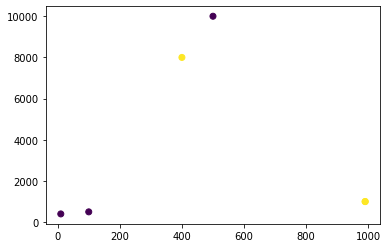

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(*zip(*X), c=y)

In [ ]:
model = LogisticRegression()
model.fit(X, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
model.predict(X)

array([0, 0, 1, 0, 1, 1])

In [ ]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
X

array([[  100,   500],
       [   10,   400],
       [  500, 10000],
       [  400,  8000],
       [  990,  1000],
       [  990,  1000]])

In [ ]:
df = pd.DataFrame({"X1": X[:, 0], "X2": X[:, 1], "Y": y})
df

,X1,X2,Y
0,100,500,0
1,10,400,0
2,500,10000,0
3,400,8000,1
4,990,1000,1
5,990,1000,1


In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(df.values[:, :-1], df.values[:, -1])

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
# Same as the one below
model = sm.Logit(y, sm.add_constant(X))
result = model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.315673
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                    6
Model:                          Logit   Df Residuals:                        3
Method:                           MLE   Df Model:                            2
Date:                Mon, 07 Jun 2021   Pseudo R-squ.:                  0.5446
Time:                        13:28:30   Log-Likelihood:                -1.8940
converged:                       True   LL-Null:                       -4.1589
Covariance Type:            nonrobust   LLR p-value:                    0.1038
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -3.0700      3.034     -1.012      0.312      -9.016       2.876
x1             0.0089      0.

In [ ]:
model = smf.logit(formula="Y ~ X1 + X2", data=df).fit()
print(model.summary())

Optimization terminated successfully.
         Current function value: 0.315673
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:                      Y   No. Observations:                    6
Model:                          Logit   Df Residuals:                        3
Method:                           MLE   Df Model:                            2
Date:                Mon, 07 Jun 2021   Pseudo R-squ.:                  0.5446
Time:                        13:28:30   Log-Likelihood:                -1.8940
converged:                       True   LL-Null:                       -4.1589
Covariance Type:            nonrobust   LLR p-value:                    0.1038
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -3.0700      3.034     -1.012      0.312      -9.016       2.876
X1             0.0089      0.

In [ ]:
# Normalize or standardize
Xs = StandardScaler().fit_transform(X)
Xs

array([[-1.03408956, -0.75530116],
       [-1.26773323, -0.78061851],
       [ 0.00432673,  1.64984778],
       [-0.25527734,  1.14350063],
       [ 1.2763867 , -0.62871437],
       [ 1.2763867 , -0.62871437]])

In [ ]:
dfs = pd.DataFrame({"X1s": Xs[:, 0], "X2s": Xs[:, 1], "Y": y})
dfs

,X1s,X2s,Y
0,-1.034090,-0.755301,0
1,-1.267733,-0.780619,0
2,0.004327,1.649848,0
3,-0.255277,1.143501,1
4,1.276387,-0.628714,1
5,1.276387,-0.628714,1


In [ ]:
model_s = smf.logit(formula="Y ~ X1s + X2s", data=dfs).fit()
model_s.summary()

Optimization terminated successfully.
         Current function value: 0.315673
         Iterations 10


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      Y   No. Observations:                    6
Model:                          Logit   Df Residuals:                        3
Method:                           MLE   Df Model:                            2
Date:                Mon, 07 Jun 2021   Pseudo R-squ.:                  0.5446
Time:                        13:28:30   Log-Likelihood:                -1.8940
converged:                       True   LL-Null:                       -4.1589
Covariance Type:            nonrobust   LLR p-value:                    0.1038
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.9042      3.968      0.228      0.820      -6.872       8.680
X1s            3.4380      5.090      0.675      0.499      -6.538      13.414
X2s           -0.5369      2.507     -0.214      0.830      -5.450       4.376
==============================================================================
"""